## Import Packages

In [42]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


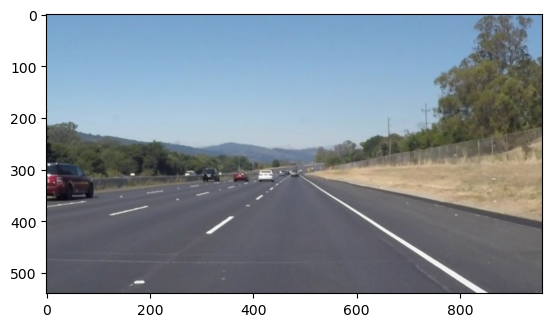

In [43]:
#reading in an image and change images if you want to check
image = mpimg.imread('input/solidWhiteRight.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image,cmap='grey')

## Lane Detection line

In [44]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=0.6, γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

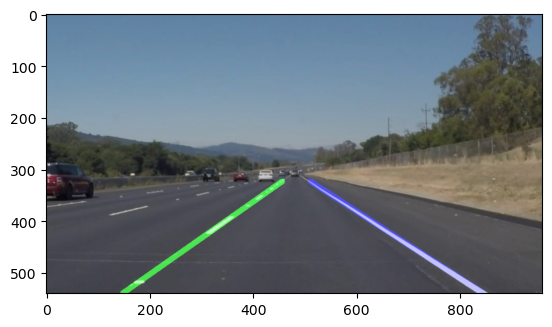

In [45]:
previous_lines = [0, 0, 0, 0]
def process_image(img): 
    
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    mask_white = cv2.inRange(img, (200,200,200), (255, 255, 255))
    
    mask_yellow = cv2.inRange(hsv_img, (15,60,20), (25, 255, 255))
    
    color_mask = cv2.bitwise_or(mask_white, mask_yellow)
    
    masked_img = np.copy(img)

    masked_img[color_mask == 0] = [0,0,0]

    gray_img = grayscale(masked_img)

    kernel_size = 5
    blurred_gray_img = gaussian_blur(gray_img, kernel_size)

    low_threshold = 50
    high_threshold = 150
    edges_from_img = canny(blurred_gray_img, low_threshold, high_threshold)

    imshape = img.shape
    vertices = np.array([[(0,imshape[0]),(4*imshape[1]/9, 6*imshape[0]/10), (5*imshape[1]/9, 6*imshape[0]/10), (imshape[1],imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(edges_from_img, vertices)

    rho = 2
    theta = np.pi/180 
    threshold = 15
    min_line_len = 10 
    max_line_gap = 5    
    line_img = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)

    overlay_img = weighted_img(line_img, img)
    
    return overlay_img
img = mpimg.imread('input/solidWhiteRight.jpg')
img_out = process_image(img)
plt.imshow(img_out)
previous_lines = [0, 0, 0, 0]

## Import everything needed to edit/save/watch video clips

In [46]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [47]:
white_output = 'test_videos_output/1.mp4'
clip1 = VideoFileClip("test_videos/1.mp4")
white_clip = clip1.fl_image(process_image) 
%time white_clip.write_videofile(white_output, audio=False)

Moviepy - Building video test_videos_output/1.mp4.
Moviepy - Writing video test_videos_output/1.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/1.mp4
CPU times: total: 1min 6s
Wall time: 1min 1s


# Images and Videos are saved at specified Path or location as shown above